In [14]:
import pandas as pd
df=pd.read_csv('heart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [15]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [16]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [17]:
df.drop(['FastingBS','ExerciseAngina'],axis=1,inplace=True)


In [18]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,Normal,172,0.0,Up,0
1,49,F,NAP,160,180,Normal,156,1.0,Flat,1
2,37,M,ATA,130,283,ST,98,0.0,Up,0
3,48,F,ASY,138,214,Normal,108,1.5,Flat,1
4,54,M,NAP,150,195,Normal,122,0.0,Up,0


In [19]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df['Sex']=l.fit_transform(df['Sex'])
df['ChestPainType']=l.fit_transform(df['ChestPainType'])
df['RestingECG']=l.fit_transform(df['RestingECG'])
df['ST_Slope']=l.fit_transform(df['ST_Slope'])

In [20]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,1,172,0.0,2,0
1,49,0,2,160,180,1,156,1.0,1,1
2,37,1,1,130,283,2,98,0.0,2,0
3,48,0,0,138,214,1,108,1.5,1,1
4,54,1,2,150,195,1,122,0.0,2,0


<Axes: ylabel='RestingBP'>

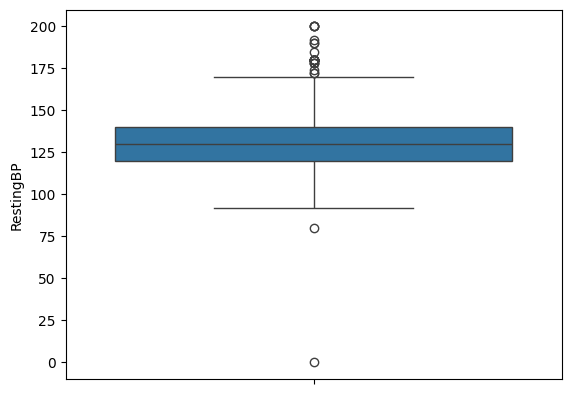

In [22]:
import seaborn as sns
sns.boxplot(df['RestingBP'])

<Axes: xlabel='Age', ylabel='Cholesterol'>

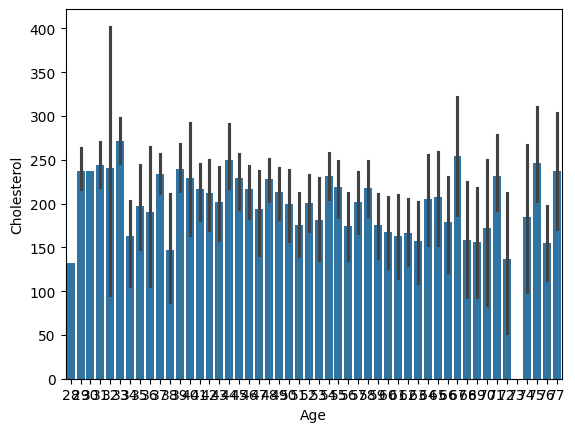

In [24]:
sns.barplot(data=df,x=df['Age'],y=df['Cholesterol'])

In [25]:
x=df.drop('HeartDisease',axis=1)

In [28]:
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,Oldpeak,ST_Slope
0,40,1,1,140,289,1,172,0.0,2
1,49,0,2,160,180,1,156,1.0,1
2,37,1,1,130,283,2,98,0.0,2
3,48,0,0,138,214,1,108,1.5,1
4,54,1,2,150,195,1,122,0.0,2
...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,1,132,1.2,1
914,68,1,0,144,193,1,141,3.4,1
915,57,1,0,130,131,1,115,1.2,1
916,57,0,1,130,236,0,174,0.0,1


In [27]:
y=df.HeartDisease
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [30]:
len(xtrain)

734

In [32]:
len(xtest)

184

In [35]:
len(ytrain)


734

In [34]:
len(ytest)

184

In [36]:
xtrain.shape

(734, 9)

In [37]:
xtest.shape

(184, 9)

In [38]:
ytrain.shape

(734,)

In [39]:
ytest.shape

(184,)

In [43]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)

c:\Users\RISHIKA ASHOKAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
model.predict(xtest)

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [45]:
ytest

239    1
727    1
36     1
703    0
15     0
      ..
730    0
420    0
892    0
252    0
192    0
Name: HeartDisease, Length: 184, dtype: int64

In [46]:
model.score(xtest,ytest)

0.8478260869565217

In [47]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier()
model1.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [48]:
model1.predict(xtest)

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [49]:
ytest

239    1
727    1
36     1
703    0
15     0
      ..
730    0
420    0
892    0
252    0
192    0
Name: HeartDisease, Length: 184, dtype: int64

In [50]:
model1.score(xtest,ytest)

0.7663043478260869

In [51]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()
model2.fit(xtrain,ytrain)

RandomForestClassifier()

In [52]:
model2.predict(xtest)

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [53]:
ytest

239    1
727    1
36     1
703    0
15     0
      ..
730    0
420    0
892    0
252    0
192    0
Name: HeartDisease, Length: 184, dtype: int64

In [55]:
model2.score(xtest,ytest)

0.8478260869565217

In [57]:
import pickle
f=pickle.dump(model2,open('heart_model.pkl','wb'))